# Sparkify Redshift DB Dashboard

This Notebook contains some visualisations of the data in the Sparkify Redshift DB after running `etl.py`, as well as some sample analytical queries. 

For further instructions on how to setup the Redshift DB, refer to the [README](https://github.com/julianazhu/sparkify-redshift-etl/blob/master/README.md).

In [1]:
import os
import json
import psycopg2
import boto3
import matplotlib.pyplot as plt

In [2]:
# Load configs
CFG_FILE = 'dwh_config.json'

with open(CFG_FILE) as f:
    config = json.load(f)

# Data Exploration
#### Song Dataset
The first dataset is a subset of real data from the Million Song Dataset. Each file is in JSON format and contains metadata about a song and the artist of that song. The files are partitioned by the first three letters of each song's track ID.

In [27]:
# Fetch the first few records from the Song Dataset
# 
# NOTE: Env vars must be exported in the same terminal window as you use to run this notebook
# *before* opening the notebook,so exit, export the AWS variables, and restart the notebook if necessary.

AWS_ACCESS_KEY = os.environ['AWS_ACCESS_KEY_ID']
AWS_SECRET = os.environ['AWS_SECRET_ACCESS_KEY']

s3_resource = boto3.resource('s3')
bucket_name = 'udacity-dend'

def get_bucket_file_keys(s3_resource, bucket, folder_name, n_files):
    """ Retrieves specified number of file keys from 
    """
    file_keys = []
    i = 0

    for bucket_object in bucket.objects.filter(Prefix=folder_name):
        print(bucket_object)
        if i > 0:
            # First object is the song-data folder
            file_keys.append(bucket_object.key)
        i = i+1
        if i == (n_files + 1):
            break
    return file_keys

song_data_file_keys = get_bucket_file_keys(s3_resource, s3_resource.Bucket(bucket_name), 'song-data', 3)


s3.ObjectSummary(bucket_name='udacity-dend', key='song-data/')
s3.ObjectSummary(bucket_name='udacity-dend', key='song-data/A/A/A/TRAAAAK128F9318786.json')
s3.ObjectSummary(bucket_name='udacity-dend', key='song-data/A/A/A/TRAAAAV128F421A322.json')
s3.ObjectSummary(bucket_name='udacity-dend', key='song-data/A/A/A/TRAAABD128F429CF47.json')


In [39]:
# Print the file contents of each of the files
from json import JSONDecodeError

s3_client = boto3.client('s3',     
                    region_name=config['AWS']['REGION'],
                    aws_access_key_id=AWS_ACCESS_KEY,
                    aws_secret_access_key=AWS_SECRET
                    )

def print_s3_json_files(s3_client, bucket, file_keys):
    for key in file_keys:
        content_object = s3_client.get_object(Bucket=bucket, Key=key)
        file_content = content_object['Body'].read().decode('utf-8')
        print("File contents of ", key, "-------------------------------------------------------")
        try:
            json_content = json.loads(file_content)
            print(json_content, "\n")
        except JSONDecodeError:
            print(file_content, "\n")
        
print_s3_json_files(s3_client, bucket_name, song_data_file_keys)

File contents of  song-data/A/A/A/TRAAAAK128F9318786.json -------------------------------------------------------
{'song_id': 'SOBLFFE12AF72AA5BA', 'num_songs': 1, 'title': 'Scream', 'artist_name': 'Adelitas Way', 'artist_latitude': None, 'year': 2009, 'duration': 213.9424, 'artist_id': 'ARJNIUY12298900C91', 'artist_longitude': None, 'artist_location': ''} 

File contents of  song-data/A/A/A/TRAAAAV128F421A322.json -------------------------------------------------------
{'song_id': 'SOQPWCR12A6D4FB2A3', 'num_songs': 1, 'title': 'A Poor Recipe For Civic Cohesion', 'artist_name': 'Western Addiction', 'artist_latitude': 37.77916, 'year': 2005, 'duration': 118.07302, 'artist_id': 'AR73AIO1187B9AD57B', 'artist_longitude': -122.42005, 'artist_location': 'San Francisco, CA'} 

File contents of  song-data/A/A/A/TRAAABD128F429CF47.json -------------------------------------------------------
{'song_id': 'SOCIWDW12A8C13D406', 'num_songs': 1, 'title': 'Soul Deep', 'artist_name': 'The Box Tops', 'a

#### Log Dataset 

The second dataset consists of log files in JSON format generated by this [event simulator](https://github.com/Interana/eventsim) based on the songs in the dataset above. These simulate app activity logs from an imaginary music streaming app based on configuration settings.


In [40]:
# Fetch the first few records from the Log Dataset
log_data_file_keys = get_bucket_file_keys(s3_resource, s3_resource.Bucket(bucket_name), 'log-data', 1)


s3.ObjectSummary(bucket_name='udacity-dend', key='log-data/')
s3.ObjectSummary(bucket_name='udacity-dend', key='log-data/2018/11/2018-11-01-events.json')


In [41]:
# Print the file contents of each of the files
print_s3_json_files(s3_client, bucket_name, file_keys)

File contents of  log-data/2018/11/2018-11-01-events.json -------------------------------------------------------
{"artist":null,"auth":"Logged In","firstName":"Walter","gender":"M","itemInSession":0,"lastName":"Frye","length":null,"level":"free","location":"San Francisco-Oakland-Hayward, CA","method":"GET","page":"Home","registration":1540919166796.0,"sessionId":38,"song":null,"status":200,"ts":1541105830796,"userAgent":"\"Mozilla\/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit\/537.36 (KHTML, like Gecko) Chrome\/36.0.1985.143 Safari\/537.36\"","userId":"39"}
{"artist":null,"auth":"Logged In","firstName":"Kaylee","gender":"F","itemInSession":0,"lastName":"Summers","length":null,"level":"free","location":"Phoenix-Mesa-Scottsdale, AZ","method":"GET","page":"Home","registration":1540344794796.0,"sessionId":139,"song":null,"status":200,"ts":1541106106796,"userAgent":"\"Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/537.36 (KHTML, like Gecko) Chrome\/35.0.1916.153 Safari\/537.36\"",

File contents of  log-data/2018/11/2018-11-03-events.json -------------------------------------------------------
{"artist":null,"auth":"Logged Out","firstName":null,"gender":null,"itemInSession":0,"lastName":null,"length":null,"level":"free","location":null,"method":"PUT","page":"Login","registration":null,"sessionId":52,"song":null,"status":307,"ts":1541207073796,"userAgent":null,"userId":""}
{"artist":null,"auth":"Logged In","firstName":"Celeste","gender":"F","itemInSession":1,"lastName":"Williams","length":null,"level":"free","location":"Klamath Falls, OR","method":"GET","page":"Home","registration":1541077528796.0,"sessionId":52,"song":null,"status":200,"ts":1541207123796,"userAgent":"\"Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/537.36 (KHTML, like Gecko) Chrome\/37.0.2062.103 Safari\/537.36\"","userId":"53"}
{"artist":"Mynt","auth":"Logged In","firstName":"Celeste","gender":"F","itemInSession":2,"lastName":"Williams","length":166.94812,"level":"free","location":"Klamath Fa

In [23]:
# Connect to Redshift DB with config details defined in the config file. 
# If you have not set up your Redshift cluster yet, run setup_redshift.py, 
# create_tables.py and etl.py to load the data.
conn = psycopg2.connect(
    "host={} dbname={} user={} password={} port={}".format(
        config['CLUSTER']['HOST'],
        config['CLUSTER']['DB_NAME'],
        config['CLUSTER']['DB_USER'],
        config['CLUSTER']['DB_PASSWORD'],
        config['CLUSTER']['DB_PORT'],
    )
)

cur = conn.cursor()

## DB Schema
The Sparkify DB is uses a star-schema design optimised on queries relating to songs played in the app.

**Fact Table:** Songplays
**Dimension Tables:** Songs, Times, Artists, Users

There are also two staging tables, `staging_events` and `staging_songs` in which the raw data from the Udacity S3 Buckets get loaded into before being transformed into the final schema.

![Sparkify DB Schema](images/sparkify_db.png)

table_counts= [105, 14896, 10025, 8023, 333, 14896, 8056]


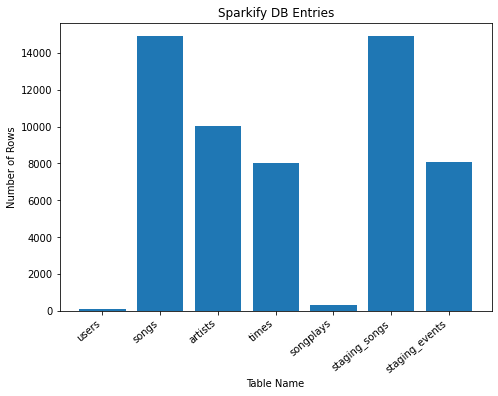

In [24]:
# Create a plot of the number of rows in each table
tables = ['users','songs','artists', 'times', 'songplays', 'staging_songs', 'staging_events']

try:
    table_counts = []
    
    for i, table in enumerate(tables):
        query = "SELECT COUNT(*) FROM " + table
        cur.execute(query)
        table_counts.append(cur.fetchone()[0])
    print("table_counts=", table_counts)
    
except Exception as e:
    print(e)

# Create the bar chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(tables,table_counts)
plt.setp(ax.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.xlabel('Table Name')
plt.ylabel('Number of Rows')
plt.title("Sparkify DB Entries")
plt.show()

In [19]:
query = """
SELECT
    *
FROM staging_songs
"""

try:
    cur.execute(query)
    result = cur.fetchone()
    print(result)
    
except Exception as e:
    print(e)

('ARV6GHH1187B9AED0D', 62.19845, 'SWEDEN', 17.55142, 'Sofia Talvik', 249.417, 1, 'SOBXHCE12AB018B6AC', None, 2008)


In [21]:
# Close the connection to the Redshift Cluster DB
# Remember to delete the Cluster if you aren't using it anymore using `cleanup_redshift.py`
conn.close()

{'song_id': 'SOBLFFE12AF72AA5BA', 'num_songs': 1, 'title': 'Scream', 'artist_name': 'Adelitas Way', 'artist_latitude': None, 'year': 2009, 'duration': 213.9424, 'artist_id': 'ARJNIUY12298900C91', 'artist_longitude': None, 'artist_location': ''}
